# Insurance Fraud Prediction Project

## Data Description
To  create a predictive model that predicts if an insurance claim is fraudulent or not using the provided dataset

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [60]:
df=pd.read_csv('Insurance')

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Data has been imported and we can see the first 5 rows of the data using df.head() function

## Exploratory Data Analysis

In [61]:
df.shape

(1000, 40)

This is the shape of data

In [62]:
pd.set_option('display.max_rows',None)

In [63]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

These are the datatypes of each columns which includes integer and object values 

In [64]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

These are the columns of data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [66]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Column _c39 has null values

In [67]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,28-04-1992,OH,250/500,NaN,NaN,NaN,NaN,...,?,NaN,NaN,NaN,NaN,Suburu,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


Mean is higher than median in months_as_customer,policy_number,policy-deductable,injury_claim.

There is a huge difference between 75th percentile and max coulumn in total_claim_amount.

Standard deviation is higher in months_as_customer,policy_deductable,policy_annual_preimum columns.

In [68]:
df._c39.unique()

array([nan])

This column has only nan values so we can delete this column since it is not useful

In [69]:
df=df.drop("_c39",axis=1)

In [70]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [71]:
df.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

This dataset has only Y and N values

In [72]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

This datatset has yes,no and question mark values

In [73]:
df=df.replace("?",np.NaN)

We have replaced all question mark values with NaN values

In [74]:
df.policy_bind_date.unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

Extracting year from date

In [75]:
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])
df["policy_bind_date"]

0     2014-10-17
1     2006-06-27
2     2000-06-09
3     1990-05-25
4     2014-06-06
5     2006-12-10
6     2000-04-06
7     1990-03-02
8     1997-05-02
9     2011-07-25
10    2002-05-26
11    1999-05-29
12    1997-11-20
13    2012-10-26
14    1998-12-28
15    1992-10-19
16    2005-08-06
17    2004-11-15
18    2014-12-28
19    1992-02-08
20    2002-06-25
21    2005-11-27
22    1994-05-27
23    1991-08-02
24    1996-02-02
25    2013-05-12
26    1990-09-20
27    2002-07-18
28    1990-08-02
29    2014-04-03
30    2000-02-18
31    2008-06-19
32    2003-01-08
33    1992-04-04
34    1991-01-13
35    2010-08-08
36    2003-09-03
37    1993-03-02
38    2002-11-25
39    1997-07-27
40    1995-08-05
41    2012-08-30
42    2006-04-30
43    2003-04-13
44    2007-05-12
45    2006-08-21
46    1990-08-01
47    1990-03-18
48    2008-07-01
49    1997-10-03
50    2004-10-01
51    1994-08-20
52    2002-02-06
53    1994-04-28
54    2014-08-17
55    2007-11-08
56    2008-11-20
57    1995-10-18
58    1993-05-

In [76]:
df["policy_bind_date"]=df["policy_bind_date"].dt.year

In [77]:
df["policy_bind_date"]

0      2014
1      2006
2      2000
3      1990
4      2014
5      2006
6      2000
7      1990
8      1997
9      2011
10     2002
11     1999
12     1997
13     2012
14     1998
15     1992
16     2005
17     2004
18     2014
19     1992
20     2002
21     2005
22     1994
23     1991
24     1996
25     2013
26     1990
27     2002
28     1990
29     2014
30     2000
31     2008
32     2003
33     1992
34     1991
35     2010
36     2003
37     1993
38     2002
39     1997
40     1995
41     2012
42     2006
43     2003
44     2007
45     2006
46     1990
47     1990
48     2008
49     1997
50     2004
51     1994
52     2002
53     1994
54     2014
55     2007
56     2008
57     1995
58     1993
59     2005
60     1990
61     1993
62     2014
63     2008
64     2007
65     1993
66     2011
67     1990
68     1994
69     1994
70     2011
71     1998
72     1995
73     2002
74     2004
75     2001
76     2010
77     1992
78     2010
79     2013
80     1994
81     1997
82     2011
83  

In [78]:
df["policy_csl"]=df["policy_csl"].str.replace('/',"")

In [79]:
df["policy_csl"]

0       250500
1       250500
2       100300
3       250500
4      5001000
5       250500
6       250500
7       100300
8       100300
9       100300
10      100300
11      100300
12     5001000
13      100300
14      250500
15      100300
16     5001000
17     5001000
18     5001000
19     5001000
20      250500
21     5001000
22      100300
23      100300
24      100300
25      100300
26      100300
27      100300
28      100300
29     5001000
30      250500
31      100300
32     5001000
33      100300
34     5001000
35      100300
36      100300
37     5001000
38     5001000
39      250500
40      100300
41      250500
42     5001000
43      250500
44      100300
45      250500
46      100300
47     5001000
48     5001000
49      100300
50      250500
51      100300
52      100300
53      100300
54      250500
55      100300
56      250500
57     5001000
58      250500
59      250500
60      100300
61     5001000
62     5001000
63     5001000
64      250500
65      100300
66      25

In [80]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [81]:
df.incident_city.unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

## Using LabelEncoder for data type conversion and replacing NaN values

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','incident_severity','authorities_contacted','incident_state','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported','collision_type','incident_city']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
    df=df.replace(np.nan,df.mean())

In [84]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

All the object data are converted

In [45]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,1991,2,2,1000,1310.80,0,431289,...,1,2,87200,17440,8720,61040,10,35,2006,0
996,285,41,186934,2014,0,0,1000,1436.79,0,608177,...,3,2,108480,18080,18080,72320,5,21,2015,0
997,130,34,918516,2003,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,3,11,1996,0
998,458,62,533940,2011,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,34,1998,0
999,456,60,556080,1996,2,1,1000,766.19,0,612260,...,3,2,5060,460,920,3680,12,4,2007,0


In [48]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

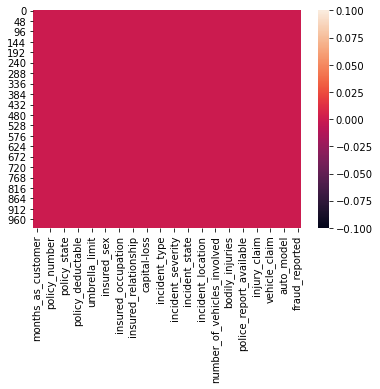

In [43]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [44]:
dfcor=df.corr()
dfcor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.048276,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.012186,-0.053511,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.037444,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.015328,-0.041415,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.040099,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,-0.010198,-0.018009,-0.008762,-0.010678,-0.020184,0.015876,0.002251,-0.000183,-0.029443
policy_bind_date,-0.048276,-0.037444,-0.040099,1.000000,-0.007276,-0.016466,-0.049598,0.001249,0.048008,-0.001100,...,0.055907,-0.006072,-0.000146,0.002529,-0.000970,-0.000610,0.029710,-0.014145,0.015164,-0.000059
policy_state,-0.000328,-0.014533,0.072815,-0.007276,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.004528,-0.037283,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,-0.016466,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,-0.007507,-0.055758,-0.078818,-0.042216,-0.046791,-0.020243,0.030257,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.049598,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.017273,0.064452,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.001249,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,-0.058433,0.007569,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.048008,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,0.034177,-0.040344,-0.045412,-0.023790,-0.038584,0.005576,-0.032504,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.001100,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,0.050983,-0.033873,-0.017495,-0.006841,-0.041083,0.043666,-0.022378,-0.032736,0.019368


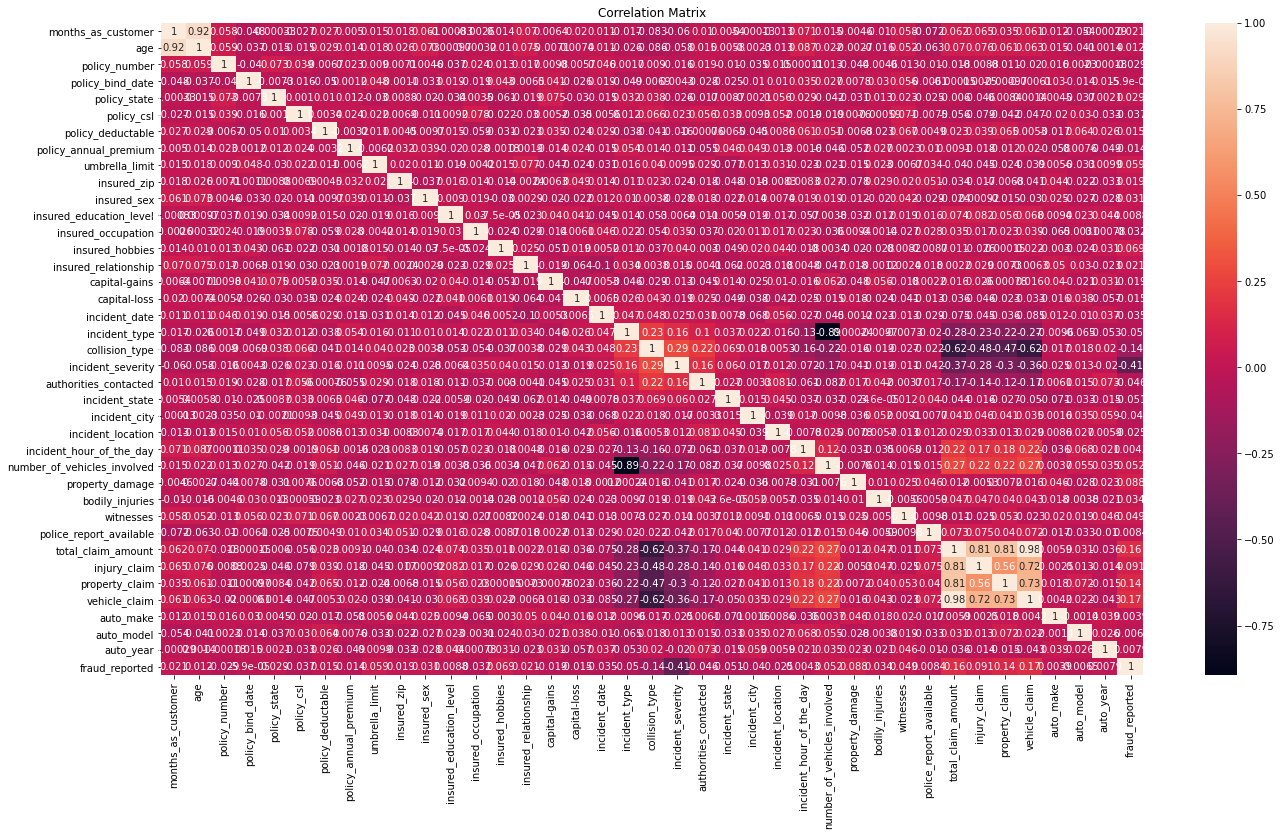

In [49]:
plt.figure(figsize=[22,12])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

Incident_type  and number of vechicle involved are negatively correlated to each other.

Total calim amount is positively correlated with injury_claim,property_claim and vehicle_claim.

collision_type is negatively correlated with vehicle_claim.

Month as customer and age are positively correlated with each other.

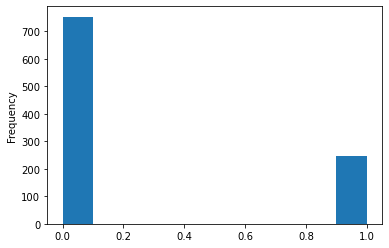

In [50]:
df['fraud_reported'].plot.hist()

0 has highest frequency

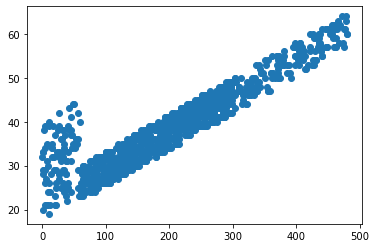

In [52]:
plt.scatter(df['months_as_customer'],df['age'])
plt.show()

This shows the relation between months as customer and age

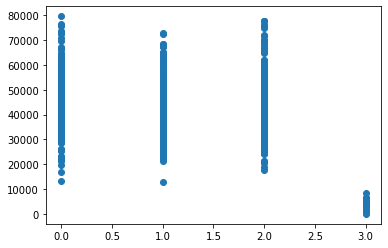

In [54]:
plt.scatter(df['collision_type'],df['vehicle_claim'])
plt.show()

Scatter plot stating the relation between collision_type and vehicle_claim

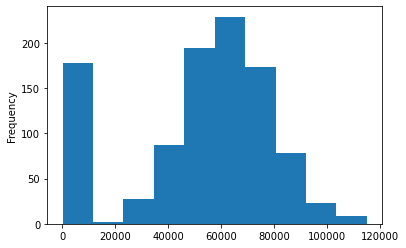

In [56]:
df['total_claim_amount'].plot.hist()

Total claim amount is more in 60000 and 80000

## Checking Outliers using boxplot

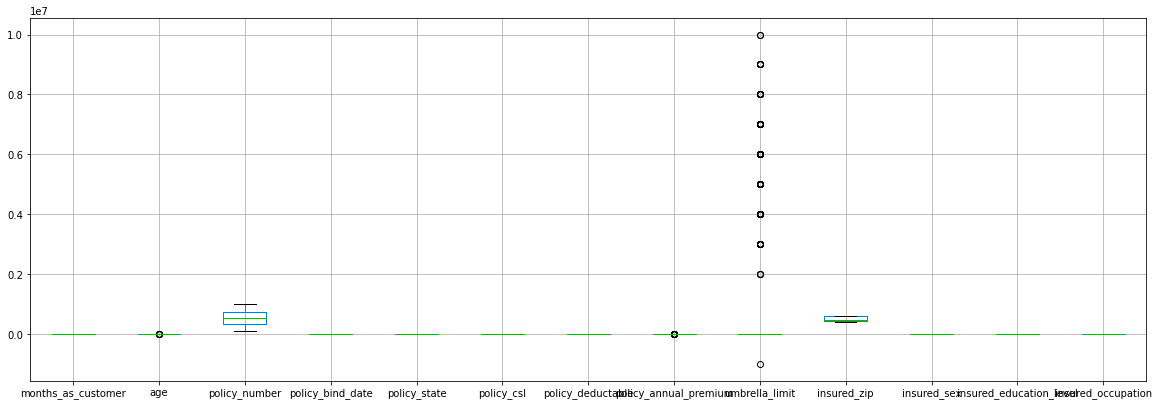

In [57]:
df.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

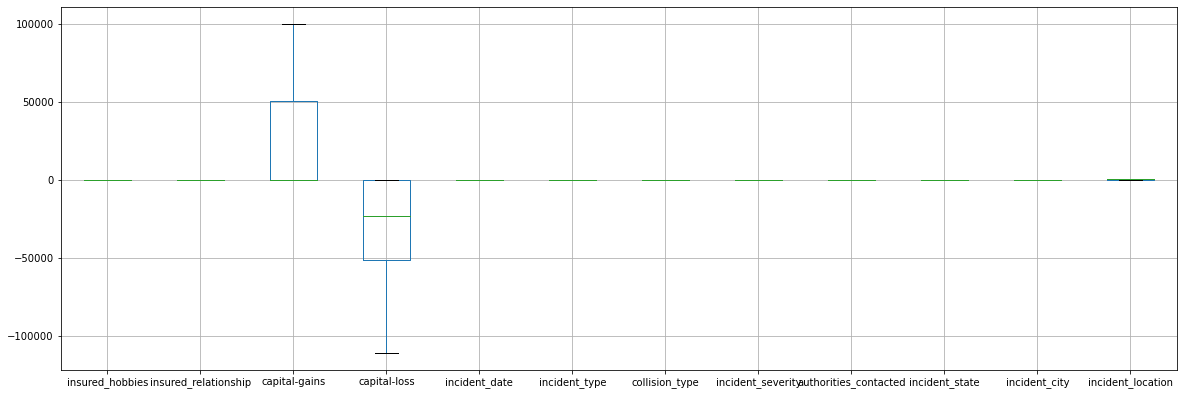

In [58]:
df.iloc[:,13:25].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

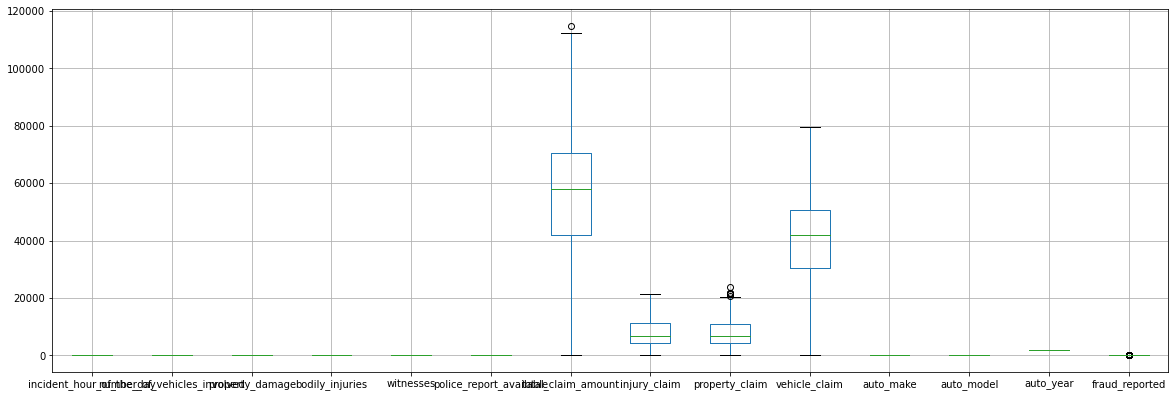

In [59]:
df.iloc[:,25:40].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are ouliers in property_claim,umbrella_limt, available_claim

## Removing Outliers

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 0.09595307, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 0.79152739, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 0.55056594, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.04786687, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.03830297, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [86]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [87]:
z[31][8]

3.0044538458871766

In [88]:
z[975][8]

3.4399450541618797

In [89]:
df_new=df[(z<3).all(axis=1)]

In [90]:
 df.shape

(1000, 39)

In [91]:
df_new.shape

(980, 39)

In [92]:
loss_percent=(1000-980)/1000*100
print(loss_percent)

2.0


## Checking skewness

In [93]:
x=df_new.drop("fraud_reported",axis=1)

In [94]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.065022
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


There some skewness in umbrella limit,insured_zip  which does not affect our data heavily

In [95]:
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2014,2,1,1000,1406.91,0,466132,...,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,342868,2006,1,1,2000,1197.22,5000000,468176,...,0,0,2,5070,780,780,3510,8,12,2007
2,134,29,687698,2000,2,0,2000,1413.14,5000000,430632,...,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,227811,1990,0,1,2000,1415.74,6000000,608117,...,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,367455,2014,0,2,1000,1583.91,6000000,610706,...,0,1,0,6500,1300,650,4550,0,31,2009


In [100]:
y=df_new["fraud_reported"]

In [102]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

## Finding the best Random_State

In [103]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.8095238095238095  on Random_state 179


## Creating train-test split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=179)

In [105]:
model=[GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier()]

In [106]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy_score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score of GaussianNB() is :
0.6666666666666666
[[181  56]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       237
           1       0.21      0.26      0.23        57

    accuracy                           0.67       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.70      0.67      0.68       294



Accuracy_score of SVC() is :
0.8061224489795918
[[237   0]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       237
           1       0.00      0.00      0.00        57

    accuracy                           0.81       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.65      0.81      0.72       294



Accuracy_score of DecisionTreeClassifier() is :
0.7959183673469388
[[197  40]
 [ 20  37]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     

RandomForest classifier  has highest accuracy compared to others which is 81

## Cross validation

In [107]:
svr=SVC()

In [108]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [109]:
from sklearn.model_selection import cross_val_score

In [111]:
gbscores = cross_val_score(gb,x,y,cv=5)
print(gbscores.mean())

0.6683673469387754


In [112]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.7551020408163265


In [113]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.773469387755102


In [114]:
knnscores = cross_val_score(knn,x,y,cv=5)
print(svrscores.mean())

0.7551020408163265


In [115]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.7540816326530612


In [116]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.7653061224489796


Cross validation scores can be observed

Minimum difference between accuracy_score and cross validation for DecisionTree Claasifier is less that is 2,so we can go for Decision Tree Classsifier.

## Hyper parameter Tunning

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [119]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [120]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [121]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [122]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [123]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [124]:
accuracy_score(y_test,GCV_pred)

0.8639455782312925

## AUC_ROC Curve

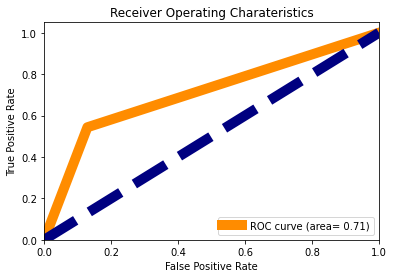

In [125]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(predm,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10, label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristics')
plt.legend(loc="lower right" )
plt.show()

## Saving the best Model

In [126]:
import joblib
joblib.dump(GCV.best_estimator_,"Insurance Fraud Detection.pkl")

['Insurance Fraud Detection.pkl']

In [127]:
mod=joblib.load('Insurance Fraud Detection.pkl')